# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !

In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

## Basic Data Checkup

In [3]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [4]:
df.shape

(51290, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
# Checking for null/missing values
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
# Unique Values
obj_col = df.columns
for col in obj_col:
    print("{}: {}".format(col,len(df[col].unique())))

Row ID: 51290
Order ID: 25035
Order Date: 1430
Ship Date: 1464
Ship Mode: 4
Customer ID: 1590
Customer Name: 795
Segment: 3
City: 3636
State: 1094
Country: 147
Postal Code: 632
Market: 7
Region: 13
Product ID: 10292
Category: 3
Sub-Category: 17
Product Name: 3788
Sales: 22995
Quantity: 14
Discount: 27
Profit: 24575
Shipping Cost: 10037
Order Priority: 4


From the above results, the `Row ID` is constant so we can remove the column. We won't drop the `Postal Code` instead we will add the postal code of respective city.

In [8]:
data = df.drop(columns=['Row ID', 'Postal Code']) #Dropping the Row ID column
data.shape

(51290, 22)

In [9]:
# sorting data by order date
data.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [10]:
data.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [11]:
data.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [12]:
data['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [13]:
data['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [14]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Guarenas           1
Halluin            1
Battipaglia        1
Penglai            1
Romeoville         1
Name: City, Length: 3636, dtype: int64

In [15]:
data['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Chad                2
Eritrea             2
Burundi             2
South Sudan         2
Swaziland           2
Name: Country, Length: 147, dtype: int64

In [16]:
data['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [17]:
data['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [18]:
data['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [19]:
data['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [20]:
data['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [21]:
# Creating a new column for Unit Price, Year, Month, Interval
data['Unit Price'] = data['Sales']/data['Quantity']
data['Month'] = pd.DatetimeIndex(data['Order Date']).month_name().str[:3]
data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Order Interval'] = (data['Ship Date'] - data['Order Date'])/np.timedelta64(1, 'D')

data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,Jan,2011,151.0
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,Jan,2011,212.0


### Checking for Outliers

In [22]:
# Statistical details of the dataset
data.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Year,Order Interval
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,71.657487,2012.777208,5.079041
std,487.565361,2.278766,0.212280,174.340972,57.296804,113.581515,1.098931,97.771493
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.336000,2011.000000,-322.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,11.799900,2012.000000,1.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,29.400000,2013.000000,4.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,82.160000,2014.000000,59.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,3773.080000,2014.000000,214.000000


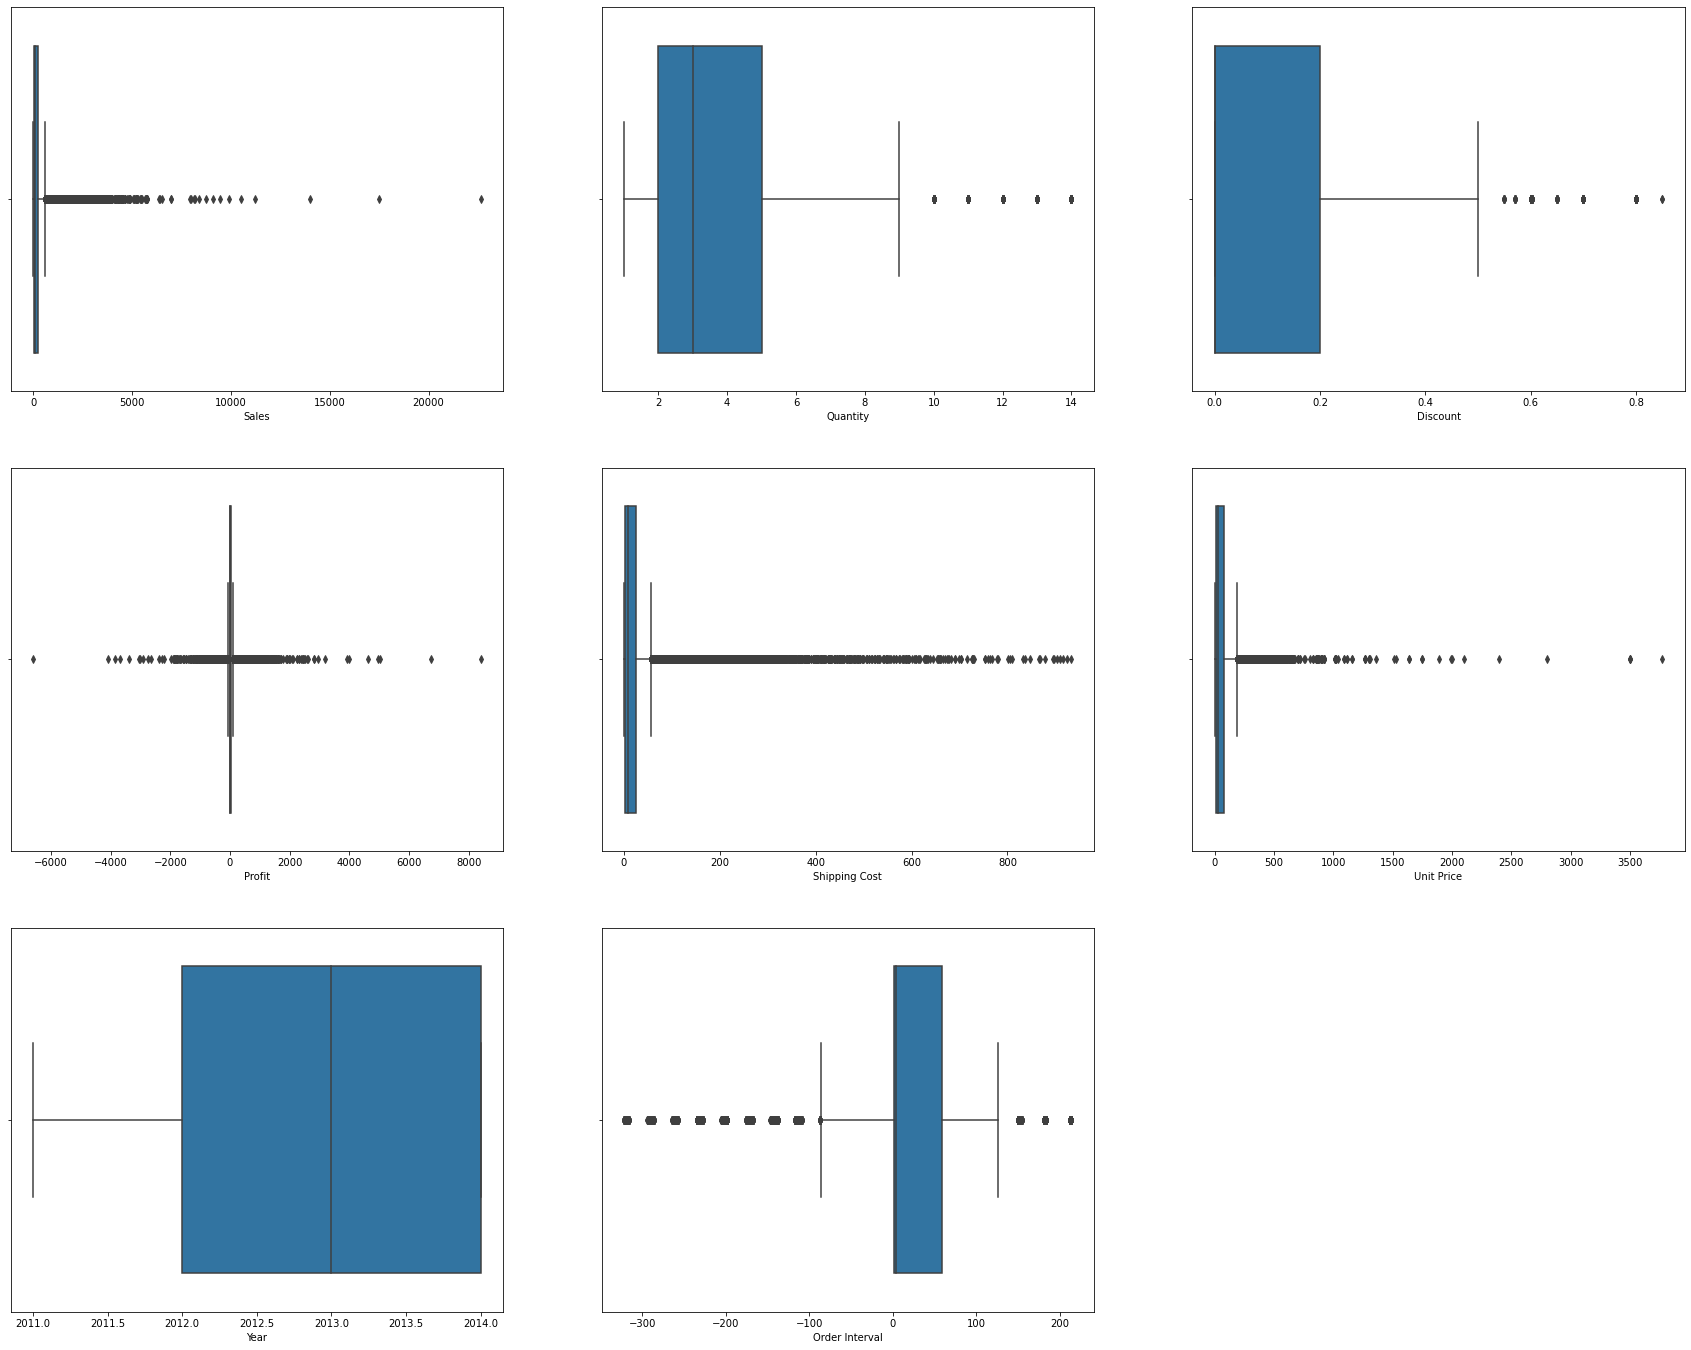

In [23]:
def check_outliers(df):
  num_col = data.select_dtypes(['float64', 'int64']).columns
  nCols = len(num_col)//3+1

  fig,ax = plt.subplots(nCols, 3, figsize = (30, 8*nCols))
  for i, col in enumerate(num_col):
        sns.boxplot(data=data, x=col, ax=ax[i//3][i%3])

  for i in range(len(num_col), 3*nCols):
        fig.delaxes(ax[i//3][i%3])

  plt.show()
    
check_outliers(df)

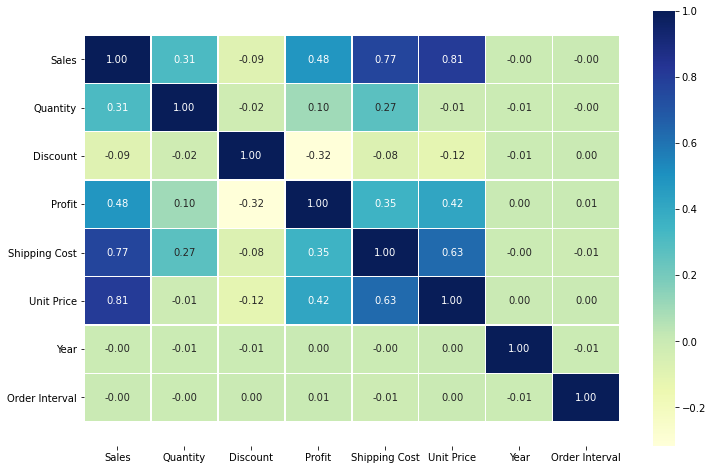

In [24]:
# Visualizing the correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Exploratory Data Analysis (EDA)

In [25]:
data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,Jan,2011,151.0
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,Jan,2011,212.0


### 1. Sales and Profit Per Market

In [26]:
market_sp = pd.DataFrame(data.groupby(["Market"])["Sales","Profit"].sum())
market_sp

,Sales,Profit
Market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


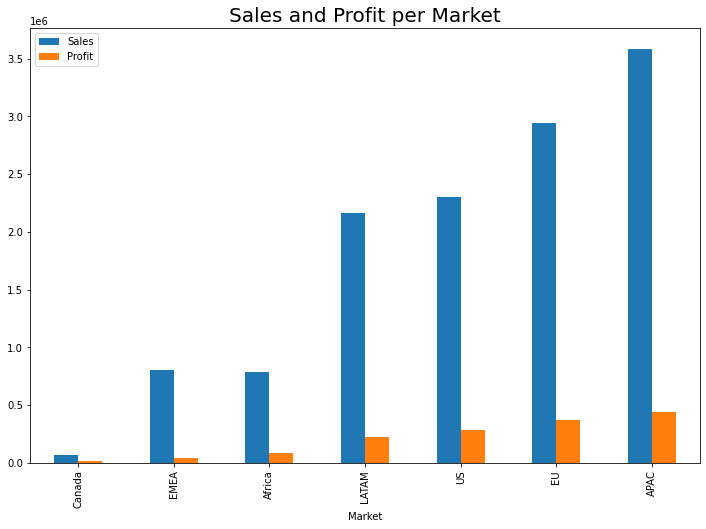

In [27]:
sort_profit2 = market_sp.sort_values("Profit", ascending=True)
sort_profit2.plot(kind="bar", figsize=(12,8))
plt.title("Sales and Profit per Market",fontsize = 20)
plt.show()

### 2. The most and least profitable market

 **From the graph above, the `Least Profitable Market` is the `Canada Market`, while the `Most Profitable Market` is the `APAC Market`**

### 3. How are you going to increase the sales for the products that least bought?

In [83]:
product_quant = pd.DataFrame(data.groupby("Product Name")["Quantity","Market","Unit Price","Shipping Cost","Discount"].sum().nsmallest(10,columns = "Quantity"))
product_quant

,Quantity,Unit Price,Shipping Cost,Discount
Product Name,,,,
Boston 1900 Electric Pencil Sharpener,1,14.980,2.08,0.00
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,119.833,13.47,0.15
"Chromcraft Training Table, Adjustable Height",1,38.144,1.53,0.80
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.184,26.94,0.20
Penpower WorldCard Pro Card Scanner,1,91.475,10.93,0.50
Xerox 20,1,6.480,0.61,0.00
Avery 5,2,2.880,1.10,0.00
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.850,0.61,0.00
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,68.232,29.02,0.20


**The Product that are least bought can be seen from the dataframe above**

### 4. Which month does the company records more sales?

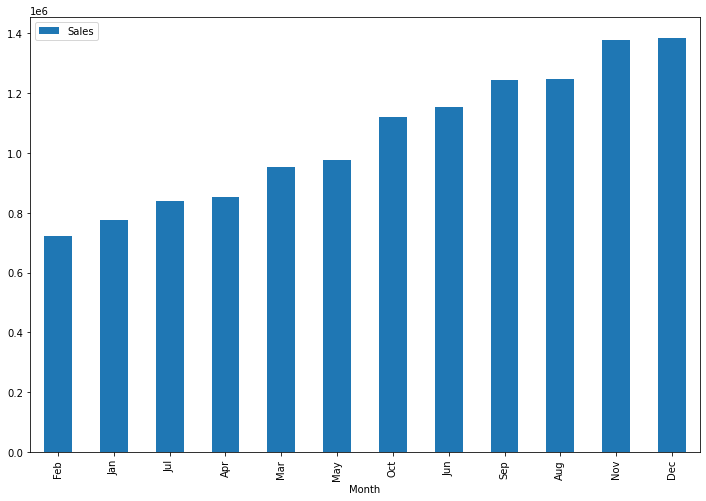

In [29]:
x = data.groupby(by='Month')[['Sales']].sum()
y = x.sort_values(by=['Sales'],ascending=True)

y.plot(kind='bar', figsize=(12,8))
plt.show()

**From the graph above, we could see that the `November & December` has the highest sales**

### 5. The trend of sales for each year

#### 2011

In [30]:
BranchA_df = data.loc[(data.Year == 2011)]
BranchA_df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,204.15,Jan,2011,151.0


In [31]:
df_trend = BranchA_df.groupby('Month')['Sales'].sum().reset_index()
df_trend.head()

,Month,Sales
0,Apr,128833.47034
1,Aug,219223.49524
2,Dec,292359.96752
3,Feb,134969.94086
4,Jan,138241.30042


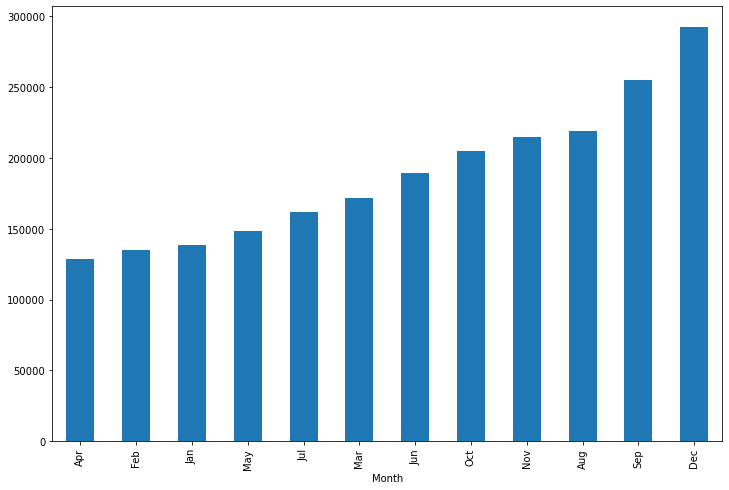

In [98]:
BranchA_df.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

#### 2012

In [33]:
BranchB_df = data.loc[(data.Year == 2012)]
BranchB_df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
3558,BO-2012-7240,2012-01-02,2012-05-02,Standard Class,BT-1305,Beth Thompson,Home Office,Pinsk,Brest,Belarus,EMEA,EMEA,OFF-SME-10004160,Office Supplies,Storage,"Smead Folders, Wire Frame",33.12,2,0.0,1.98,2.46,Medium,16.56,Jan,2012,121.0


In [34]:
df_trend = BranchB_df.groupby('Month')['Sales'].sum().reset_index()
df_trend.head()

,Month,Sales
0,Apr,187469.96192
1,Aug,271669.66086
2,Dec,291972.33306
3,Feb,152661.15144
4,Jan,162800.89338


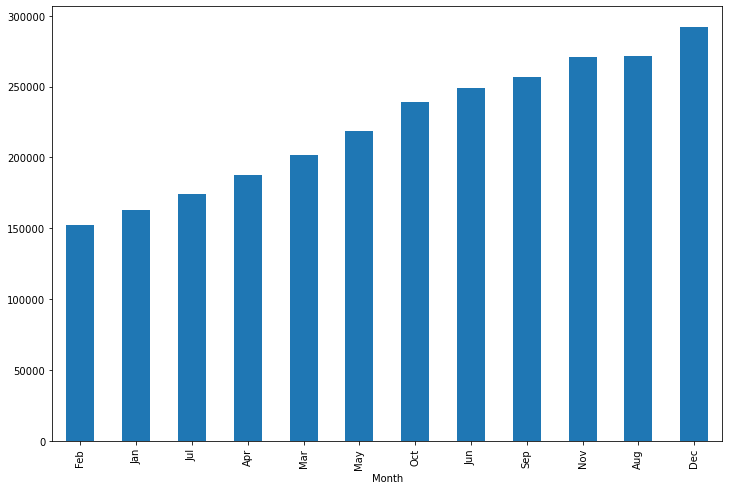

In [99]:
BranchB_df.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

#### 2013

In [36]:
BranchC_df = data.loc[(data.Year == 2013)]
BranchC_df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
7815,ES-2013-4954697,2013-01-01,2013-06-01,Standard Class,TB-21595,Troy Blackwell,Consumer,Montbrison,Rhône-Alpes,France,EU,Central,OFF-LA-10003511,Office Supplies,Labels,"Avery Round Labels, Adjustable",10.08,2,0.0,1.68,0.95,High,5.04,Jan,2013,151.0


In [37]:
df_trend = BranchC_df.groupby('Month')['Sales'].sum().reset_index()
df_trend.head()

,Month,Sales
0,Apr,233181.34844
1,Aug,323876.60716
2,Dec,371245.40880
3,Feb,191062.77216
4,Jan,206459.19582


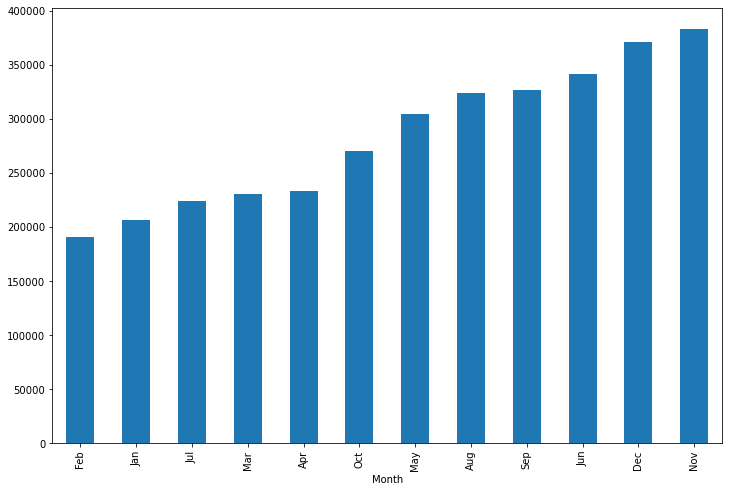

In [100]:
BranchC_df.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

#### 2014

In [39]:
BranchD_df = data.loc[(data.Year == 2014)]
BranchD_df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
13222,ES-2014-4158324,2014-01-01,2014-08-01,Standard Class,BN-11470,Brad Norvell,Corporate,Afragola,Campania,Italy,EU,South,OFF-SU-10000171,Office Supplies,Supplies,"Elite Trimmer, Easy Grip",43.29,1,0.0,20.34,2.75,Medium,43.29,Jan,2014,212.0


In [40]:
df_trend = BranchD_df.groupby('Month')['Sales'].sum().reset_index()
df_trend.head()

,Month,Sales
0,Apr,302132.54000
1,Aug,432731.04194
2,Dec,427757.39800
3,Feb,244159.30486
4,Jan,268265.52240


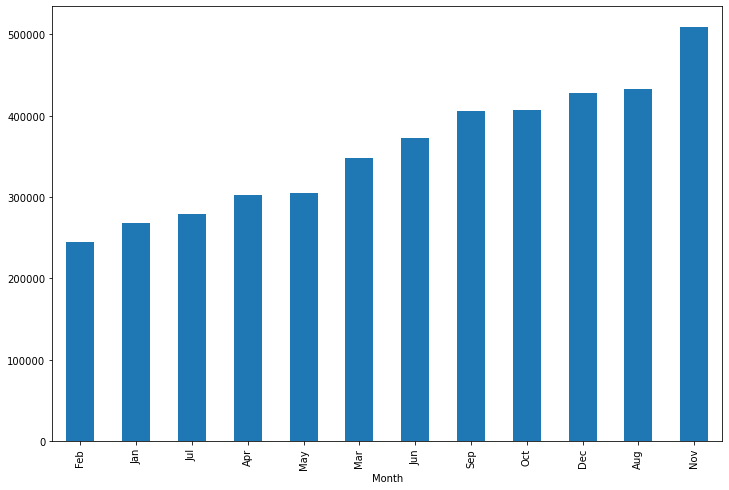

In [101]:
BranchD_df.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

In [42]:
# df = pd.Dataframe({'x': data['Month'], 'y1':})

In [43]:
# # Data
# df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# # multiple line plots
# plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# # show legend
# plt.legend()

# # show graph
# plt.show()

### 6. The trend of profit for each year

#### 2011

In [44]:
df_trend = BranchA_df.groupby('Month')['Profit'].sum().reset_index()
df_trend.head()

,Month,Profit
0,Apr,13405.46924
1,Aug,19650.67124
2,Dec,33006.85862
3,Feb,17588.83726
4,Jan,13457.23302


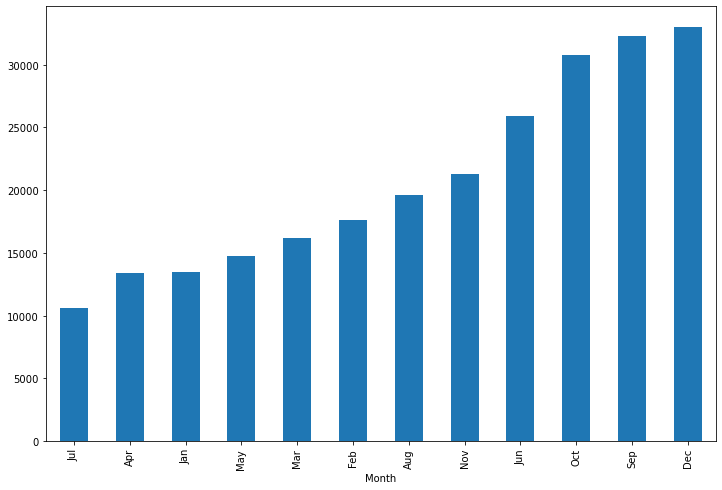

In [102]:
BranchA_df.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

#### 2012

In [46]:
df_trend = BranchB_df.groupby('Month')['Profit'].sum().reset_index()
df_trend.head()

,Month,Profit
0,Apr,20804.00532
1,Aug,36511.44996
2,Dec,31968.30416
3,Feb,17828.18244
4,Jan,19627.42058


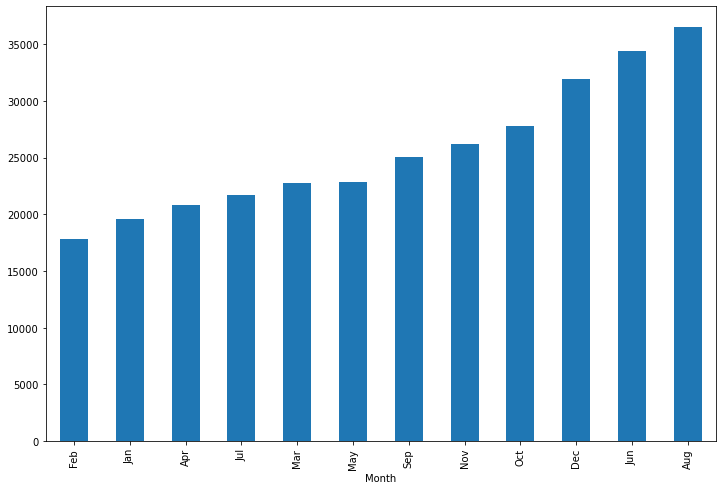

In [103]:
BranchB_df.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

#### 2013

In [48]:
df_trend = BranchC_df.groupby('Month')['Profit'].sum().reset_index()
df_trend.head()

,Month,Profit
0,Apr,26008.05144
1,Aug,32977.75576
2,Dec,47654.27990
3,Feb,31553.99756
4,Jan,26052.40252


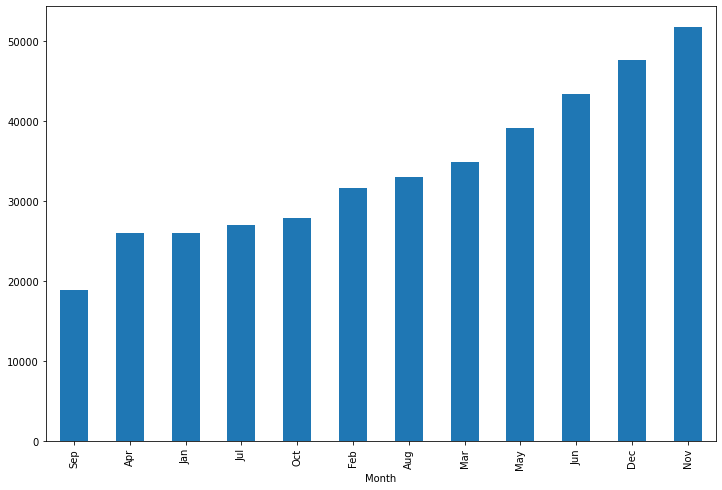

In [104]:
BranchC_df.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

#### 2014

In [50]:
df_trend = BranchD_df.groupby('Month')['Profit'].sum().reset_index()
df_trend.head()

,Month,Profit
0,Apr,35709.53320
1,Aug,46443.47934
2,Dec,48920.76000
3,Feb,29454.01876
4,Jan,31447.74660


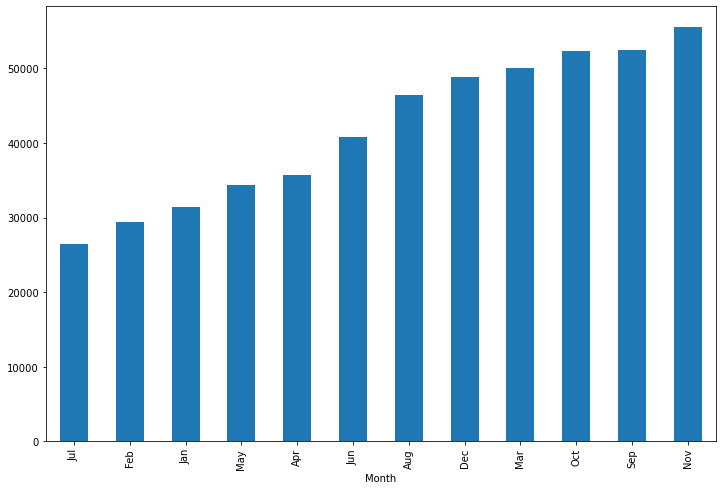

In [105]:
BranchD_df.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

### 7. The general trend of sales from 2011 - 2014

In [52]:
df_trend = data.groupby('Year')['Sales'].sum().reset_index()
df_trend

,Year,Sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


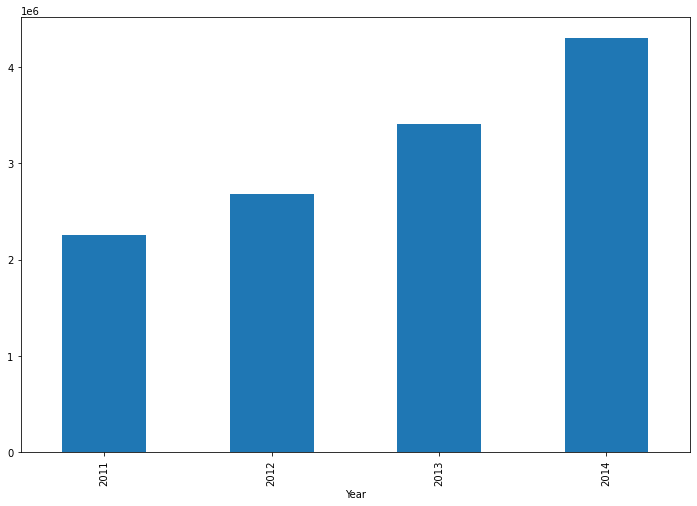

In [106]:
data.groupby('Year')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

### 8. What is the correlation between discount and sale?

In [54]:
corr = data['Discount'].corr(data['Sales'])
print("Correlation between discount and sales is: ", round(corr, 2))

Correlation between discount and sales is:  -0.09


**The correlation coefficient between `Discount` and `Sales` indicates a very weak one.**

### 9. Does the shipping cost affect the sales?

In [55]:
corr = data['Shipping Cost'].corr(data['Sales'])
print("Correlation between Shipping Cost and sales is: ", round(corr, 2))

Correlation between Shipping Cost and sales is:  0.77


**Yes, we can say that `Shipping Cost` affect `Sales` since their correlation coefficient is on the high side**

### 10. What is the dominant product category in each market?

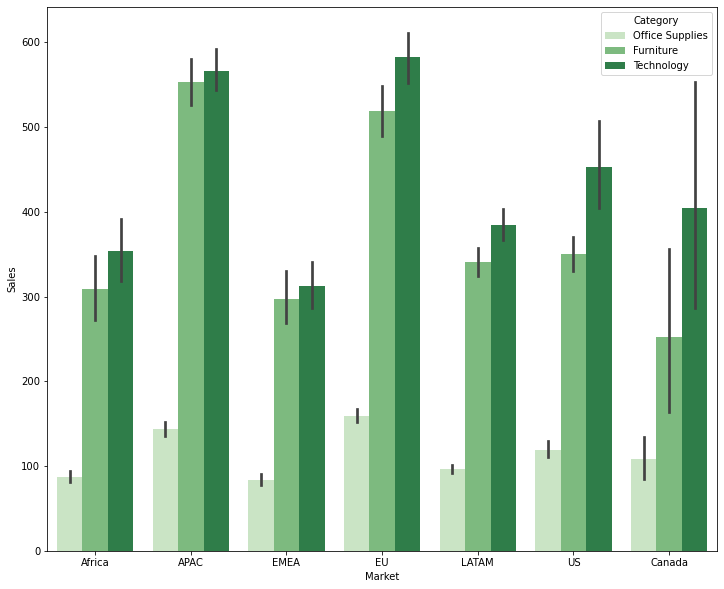

In [56]:
plt.figure(figsize=[12,10])
ax = sns.barplot(x="Market", y="Sales", hue="Category", data=data, palette="Greens")
plt.show()

**From the graph above, the dominant product category in each market is `Technology`**

### 11. City with most orders for a given product category?

#### Office Supplies

In [92]:
Office_sup = data.loc[(data.Category == 'Office Supplies')]

# Top 15 cities with the highest order
top_office = Office_sup.groupby('City')['Quantity'].sum().reset_index().nlargest(15,columns = "Quantity")
top_office

,City,Quantity
2102,New York City,2065
1747,Los Angeles,1688
2608,San Francisco,1220
2295,Philadelphia,1127
2695,Seattle,928
1279,Houston,924
2668,Santo Domingo,897
1824,Manila,813
2918,Tegucigalpa,792
1818,Managua,719


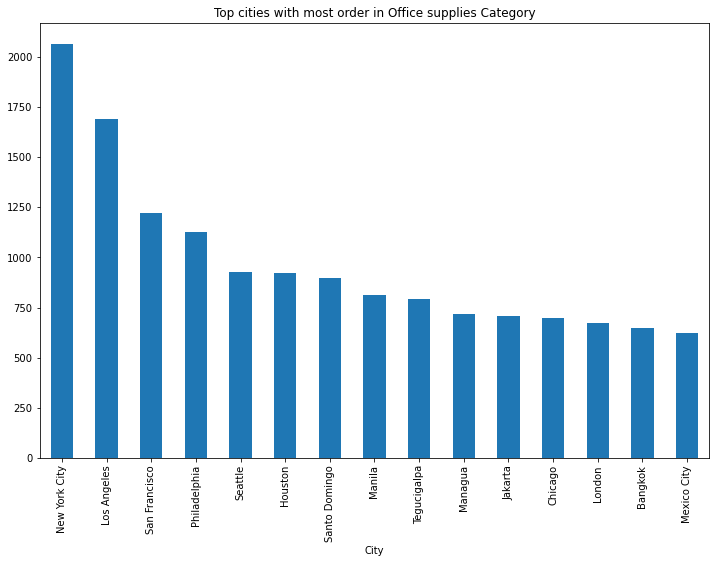

In [107]:
top_office.groupby('City')['Quantity'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8), title="Top cities with most order in Office supplies Category")
plt.show()

#### Furniture

In [97]:
Furniture = data.loc[(data.Category == 'Furniture')]

# Top 15 cities with the highest order
top_furniture = Furniture.groupby('City')['Quantity'].sum().reset_index().nlargest(15,columns = "Quantity")
top_furniture

,City,Quantity
1480,New York City,720
1221,Los Angeles,588
1616,Philadelphia,449
1281,Manila,441
1892,Santo Domingo,417
1839,San Francisco,399
1906,Seattle,370
1358,Mexico City,301
2061,Tegucigalpa,301
898,Houston,291


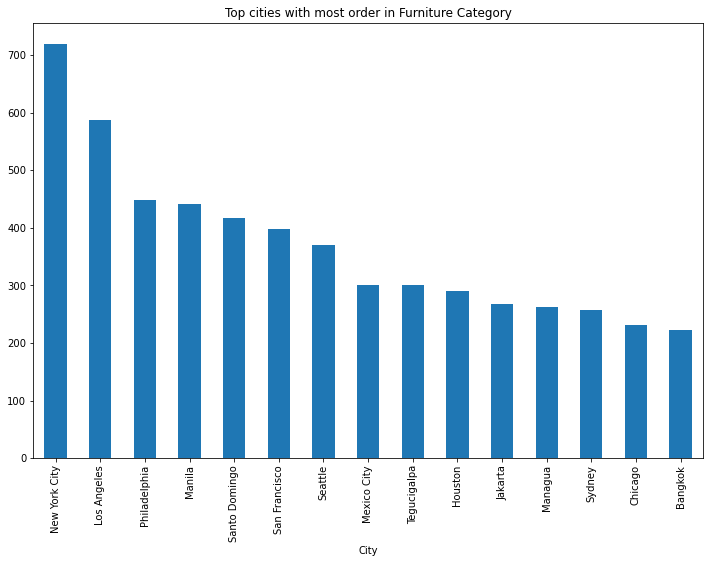

In [109]:
top_furniture.groupby('City')['Quantity'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8), title="Top cities with most order in Furniture Category")
plt.show()

#### Technology

In [110]:
Technology = data.loc[(data.Category == 'Technology')]

# Top 15 cities with the highest order
top_tech = Technology.groupby('City')['Quantity'].sum().reset_index().nlargest(15,columns = "Quantity")
top_tech

,City,Quantity
1522,New York City,632
1249,Los Angeles,603
1316,Manila,407
1655,Philadelphia,405
1930,Santo Domingo,335
1882,San Francisco,316
1949,Seattle,292
1310,Managua,252
925,Houston,251
2051,Sydney,251


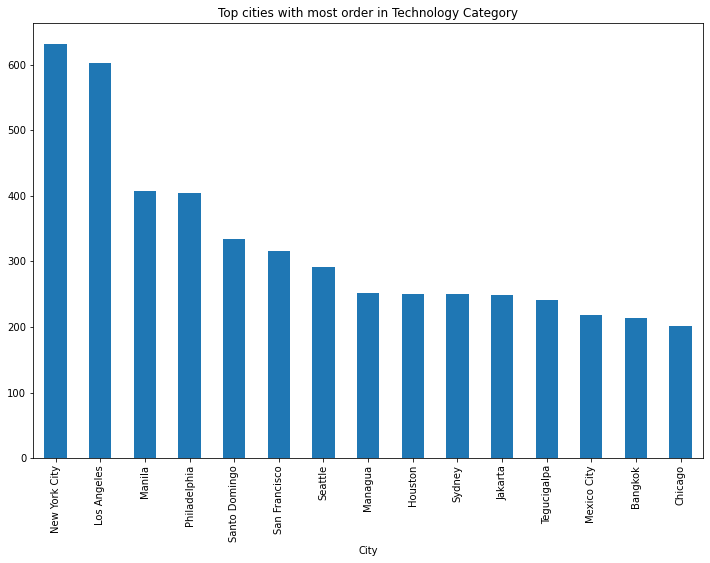

In [112]:
top_tech.groupby('City')['Quantity'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8), title="Top cities with most order in Technology Category")
plt.show()

**`New York` made the highest order with 3 seperate `Categories`**

### 12. which products are making loss?

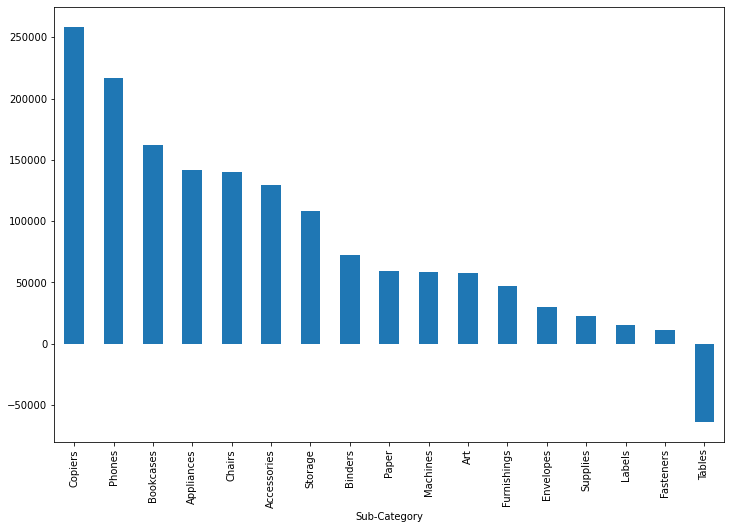

In [113]:
data.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8))
plt.show()

**`Tables` are making -ve profit, we need to figure out what's going on in that end**

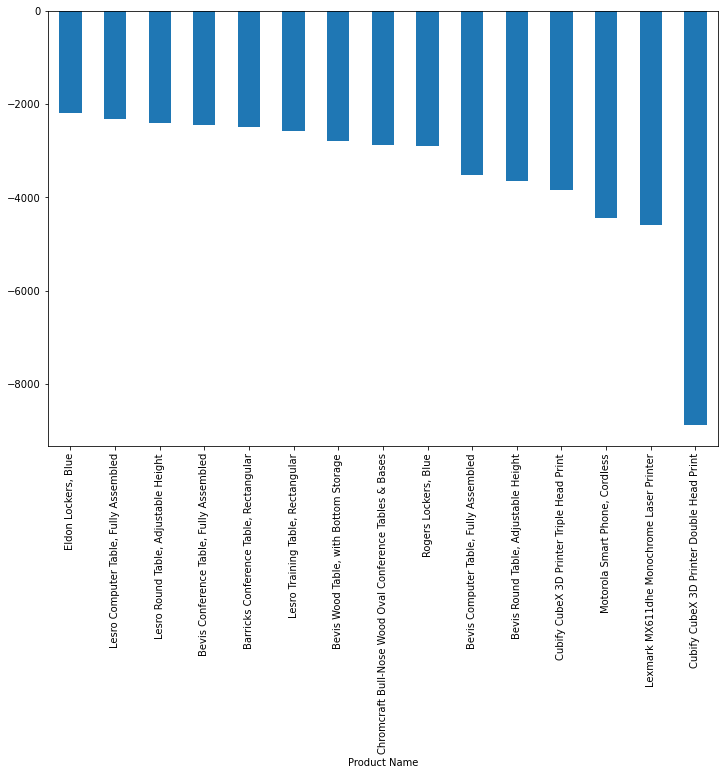

In [118]:
data.groupby("Product Name")["Profit"].sum().nsmallest(15).sort_values(ascending=False).plot(kind="bar", figsize=(12,8))
plt.show()

**The graph above shows the different product name with -ve profit i.e loss**

### 13. Which segment provides more profit?

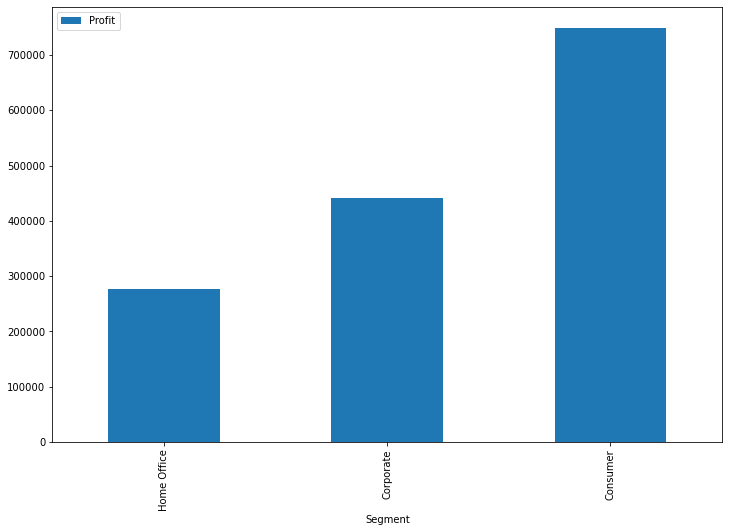

In [60]:
x = data.groupby(by='Segment')[['Profit']].sum()
y = x.sort_values(by=['Profit'],ascending=True)

y.plot(kind='bar', figsize=(12,8))
plt.show()

**`Consumer Segment` brings in the highest profit followed by `Corporate` then `Home Office`**

### 14. what is the correlation between quantity and profit?

In [61]:
corr = data['Quantity'].corr(data['Profit'])
print("Correlation between Quantity and Profit is: ", round(corr, 2))

Correlation between Quantity and Profit is:  0.1


### 15. what it the correlation between shipping cost and profit?

In [62]:
corr = data['Shipping Cost'].corr(data['Profit'])
print("Correlation between Shipping Cost and Profit is: ", round(corr, 2))

Correlation between Shipping Cost and Profit is:  0.35


### 16. Which order priority yields more sales?

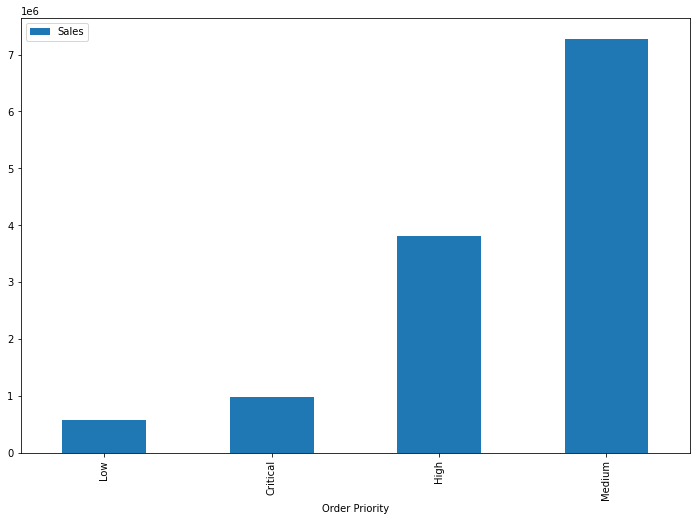

In [63]:
x = data.groupby(by='Order Priority')[['Sales']].sum()
y = x.sort_values(by=['Sales'],ascending=True)

y.plot(kind='bar', figsize=(12,8))
plt.show()

**`Medium` yields the highest `Sales`, then `High` and the rest**

### 17. What is the average shipping cost to each region?

In [64]:
avg_dist = data.groupby(by="Region")['Shipping Cost'].agg(np.mean).sort_values(ascending=False).reset_index()

# Regions with highest Average shipping cost
avg_dist.head()

,Region,Shipping Cost
0,North Asia,40.646112
1,Central Asia,38.003003
2,Oceania,34.593780
3,Southeast Asia,29.937948
4,North,27.476299


### 18. What product categories should be targetted to the  different markets?

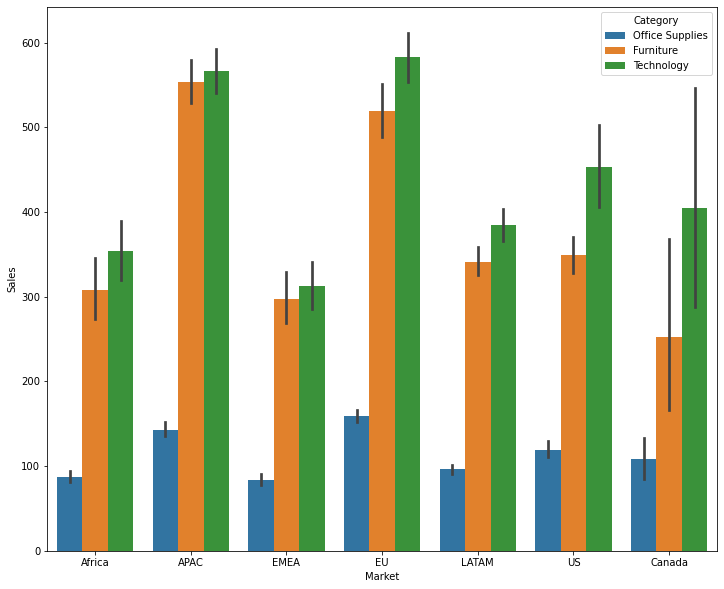

In [65]:
plt.figure(figsize=[12,10])
ax = sns.barplot(x="Market", y="Sales", hue="Category", data=data)
plt.show()

**The sales of `Technology` has been the highest so far in all `Market Region`. We could need to find out why `Office Supplies` generate the lowest Sales across the `Market`**

### 19. Does the interval between the order date and the shipping date affect sale and profit

In [66]:
corr = data['Order Interval'].corr(data['Profit'])
print("Correlation between Quantity and Profit is: ", round(corr, 2))

Correlation between Quantity and Profit is:  0.01


In [67]:
# Average Discount per city
avg_dist=data.groupby(by="City")['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Deer Park,0.8
1,Abilene,0.8
2,Missouri City,0.8
3,Romeoville,0.8
4,Kano,0.7


In [68]:
# Average Sales per city
avg_sales=data.groupby(by="City")['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Kamina,3817.26000
1,Paysandú,3473.14000
2,Whakatane,3265.44000
3,Poitiers,2958.98400
4,Plaisir,2848.28625


In [69]:
# Average Profit per city
avg_profit=data.groupby(by="City")['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Whakatane,1234.440
1,Xingtai,1068.840
2,Kamina,1068.660
3,Salto,988.120
4,Poitiers,953.274


In [70]:
# Cities having High Average Discounts
high_dist = avg_dist[avg_dist['Discount'] >= 0.7]

# Cities having Low Average Discounts
low_dist = avg_dist[avg_dist['Discount'] == 0]

# Cities having High Average Sales
high_sales = avg_sales[avg_sales['Sales'] > 500]

# Cities having Low Average Sales
low_sales = avg_sales[avg_sales['Sales'] < 50]

# Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit'] > 100]

# Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit'] < 0]

# Cities with High-Average-Discounts but Low-Average-Sales
merged = pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Deer Park,0.8,6.924000
1,Abilene,0.8,1.392000
2,Missouri City,0.8,6.370000
3,Romeoville,0.8,8.952000
4,Ibadan,0.7,49.091586
5,Ikot Ekpene,0.7,35.175375
6,Jinja,0.7,14.511857
7,Mary,0.7,40.849500
8,Minna,0.7,40.317545
9,Ilesha,0.7,24.722100


In [71]:
# Cities with high Average Sales as well as Average Profit
merged2 = pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2.head(10)

,City,Sales,Profit
0,Kamina,3817.26000,1068.66000
1,Paysandú,3473.14000,868.12000
2,Whakatane,3265.44000,1234.44000
3,Poitiers,2958.98400,953.27400
4,Plaisir,2848.28625,392.18625
5,Shuangcheng,2819.52000,338.22000
6,Xingtai,2544.96000,1068.84000
7,Jamestown,2354.39500,642.88575
8,Salto,2297.96000,988.12000
9,Asti,2243.88000,246.72000


In [72]:
# Cities where Average Discount is less but Average Sales is High
merged3 = pd.merge(low_dist,high_sales, on='City', how='inner')
merged3.head(10)

,City,Discount,Sales
0,Shouguang,0.0,897.915000
1,Shuangcheng,0.0,2819.520000
2,Zhongxiang,0.0,560.900000
3,Shumen,0.0,1272.600000
4,Shihezi,0.0,667.507500
5,Shaoxing,0.0,1583.827500
6,Shimonoseki,0.0,747.500000
7,Slough,0.0,646.475000
8,Stevenage,0.0,600.210000
9,Stockton-on-Tees,0.0,1224.573333


In [73]:
# Cities with high Average sales but low Average profit
merged4 = pd.merge(high_sales,low_profit, on='City', how='inner')
merged4.head(10)

,City,Sales,Profit
0,Houilles,987.957000,-54.963000
1,Taytay,939.714750,-103.805250
2,San Luis,932.488000,-352.018667
3,Abreu e Lima,928.256000,-81.224000
4,San Severo,925.020000,-447.180000
5,Arnhem,920.407500,-367.192500
6,Stains,874.962000,-68.058000
7,La Roche-sur-Yon,854.944500,-127.795500
8,Coudekerque-Branche,853.137000,-51.468000
9,Burlington,834.223154,-139.191431


**Author: Jammal Adeyemi**